# Part I - FordGoBike Trip Analysis
## by Yusuff Adebayo

## Introduction
> This analysis will be based on a dataset which is a compilation of the records of a bike hailing service known as FordGoBike. It contains information about individual rides made in a bike-sharing system. This dataset contains 183,412 observations with 16 variables which include: Ride duration (Secs), Start and end time, Start and end station id and Name, Start and end station Latitutude and Longitude, Bike Id, User type, Member birth year, Member gender, Bike share for all trip (Yes or No)


## Preliminary Wrangling


In [15]:
# import all packages needed for this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [16]:
# load the data
ride = pd.read_csv('201902-fordgobike-tripdata.csv')
print('The total number of rows and columns in this data are {} and {} respectively.\n' .format(ride.shape[0],ride.shape[1]),'Here is a sneak peek:')
ride.head()

The total number of rows and columns in this data are 183412 and 16 respectively.
 Here is a sneak peek:


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [17]:
# assess the statistical summary of the data
ride.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [18]:
# assess the data characteristics
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [19]:
# investigate null entries and replace the null values with the modal values
null_features = ride.isna().sum().sort_values().index[-6:]
print(' The list below contains the columns with null value:\n',null_features)
for na in null_features:
    ride[na].fillna(ride[na].mode()[0], inplace=True)
ride.isna().sum()

 The list below contains the columns with null value:
 Index(['start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_birth_year', 'member_gender'],
      dtype='object')


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [20]:
# change the wrong datatypes to the correct ones
wrongDtype = ['start_time', 'end_time','start_station_id','start_station_latitude','start_station_longitude', 
              'end_station_id','end_station_latitude','end_station_longitude', 'bike_id', 'member_birth_year']

for col in wrongDtype:
    if 'time' in col:
        ride[col] = pd.to_datetime(ride[col])
    elif 'id' in col:
        ride[col] = ride[col].astype(str)
    elif 'tude' in col:
        ride[col] = ride[col].astype(str)
    else:
        ride[col] = ride[col].astype(int)
        
ride.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183412 non-null object
start_station_latitude     183412 non-null object
start_station_longitude    183412 non-null object
end_station_id             183412 non-null object
end_station_name           183412 non-null object
end_station_latitude       183412 non-null object
end_station_longitude      183412 non-null object
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          183412 non-null int64
member_gender              183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), int64(2), object(12)
memory usage: 22.4+ MB


In [21]:
# create age column for each of the riders
currentyr = pd.datetime.now().year
birthyr = ride['member_birth_year']

ride['age'] = currentyr - birthyr

In [22]:
# create ride minutes from duration_sec column
ride['duration_min'] = (ride['duration_sec'] / 60).astype(int)

In [23]:
# create the ride's weekday from start time
ride['day_of_the_week'] = ride['start_time'].dt.day_name()

# affirming the correctness of the new entries
ride.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,day_of_the_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38,869,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.77588,-122.39317,2535,Customer,1988,Male,No,34,708,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.7693053,-122.4268256,3.0,Powell St BART Station (Market St at 4th St),37.7863752686,-122.404904366,5905,Customer,1972,Male,No,50,1030,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.7748362941,-122.44654566,70.0,Central Ave at Fell St,37.7733108789,-122.444292605,6638,Subscriber,1989,Other,No,33,608,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.8045623549,-122.271738052,222.0,10th Ave at E 15th St,37.7927143,-122.2487796,4898,Subscriber,1974,Male,Yes,48,26,Thursday


### What is the structure of your dataset?

> Initially, the Fordgobike dataset contained **183,412 rows** and **16 columns** but some feature engineering were later carried out which increased the number of columns to ***19***.  The variables included *ride duration (secs), start and end time, start and end station id and name, start and end station latitutude and longitude, bike id, user type, member birth year, member gender, bike share for all trip (yes or no), age, ride duration (mins), and days of the week.*



### What is/are the main feature(s) of interest in your dataset?

> Features of interest are those that would determine or predict if a rider would share a bike trip or not in the dataset and what period are there more trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that the trip's duration, user type, age, and gender amongst others will help to determine and predict the share status. 

## Univariate Exploration


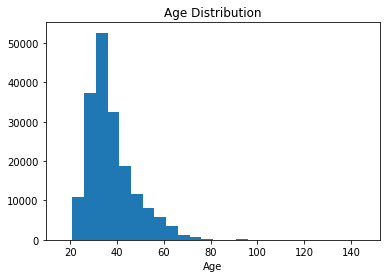

In [24]:
# plotting age distribution of the riders
binsize = 5
bins = np.arange(ride['age'].min()-binsize, ride['age'].max()+binsize, binsize)

plt.hist(data = ride, x = 'age', bins = bins)
plt.xlabel('Age')
plt.title('Age Distribution');

The maximum age of users is 144


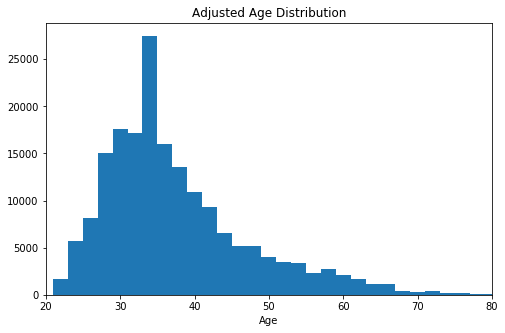

In [25]:
# reducing the bin size and the x axis to properly scrutinize the age distribution
print('The maximum age of users is ' + str(ride.age.max()))
binsize = 2
bins = np.arange(ride['age'].min()-binsize, ride['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ride, x = 'age', bins = bins)
plt.xlim([20,80])
plt.xlabel('Age')
plt.title('Adjusted Age Distribution');

As evident above, the age distribution of the riders has a positive skewness i.e. there are outliers to the right side of the histogram. Also, most of the riders are young majorly between 20 and 40 and there are few adults. However, the overall age distribution of the riders ranges from **20 to 140**. Conclusively, from the visual, most of the riders are of age **35-36** years and they are relatively the most valuable customers.

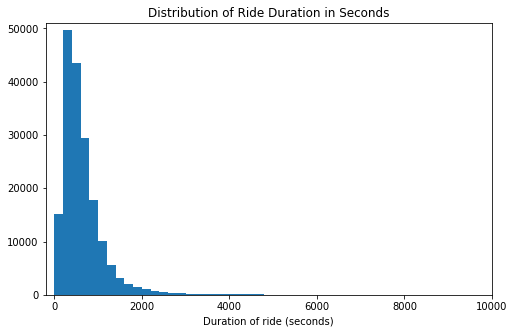

In [26]:
# Assessing the ride duration in seconds through visualization
binsize = 200
bins = np.arange(0, ride['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ride, x = 'duration_sec', bins = bins)
plt.xlabel('Duration of ride (seconds)')
plt.title('Distribution of Ride Duration in Seconds')
plt.axis([-200, 10000, 0, 51000]);

The minimum ride duration in seconds is 61 while the maximum duration is 85444


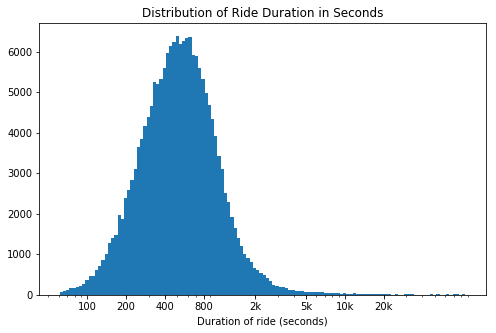

In [27]:
bins = 10 ** np.arange(np.log10(ride.duration_sec.min()), np.log10(ride.duration_sec.max())+0.025, 0.025)
ticks = [100, 200, 400, 800, 2e3, 5e3, 1e4, 2e4] 
labels = [100, 200, 400, 800, '2k', '5k', '10k', '20k']

plt.figure(figsize=[8,5])
plt.hist(data = ride, x = 'duration_sec', bins = bins)
plt.xlabel('Duration of ride (seconds)')
plt.title('Distribution of Ride Duration in Seconds')
plt.xscale('log')
plt.xticks(ticks, labels)
print('The minimum ride duration in seconds is', ride.duration_sec.min(),'while the maximum duration is', ride.duration_sec.max());

The minimum ride duration in minutes is 1 while the maximum duration is 1424 equivalent to 23hrs.


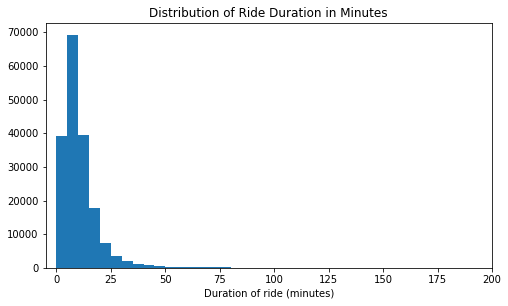

In [28]:
# Assessing the ride duration in minutes through visualization
binsize = 5
bins = np.arange(0, ride['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 4.5])
plt.hist(data = ride, x = 'duration_min', bins = bins)
plt.xlabel('Duration of ride (minutes)')
plt.title('Distribution of Ride Duration in Minutes')
plt.xlim([-5,200])
print('The minimum ride duration in minutes is', ride.duration_min.min(),'while the maximum duration is', 
      ride.duration_min.max(), 'equivalent to {}hrs.' .format(int(ride.duration_min.max()/60)));

This shows that most of the rides are usually for a short period around 1 to 20 minutes. Very few people go as far as riding for more than an hour while we still have riders going as far as 23 hours. To no suprise, the modal duration is just about 5 to 10 minutes as most people only ride for a very short period.

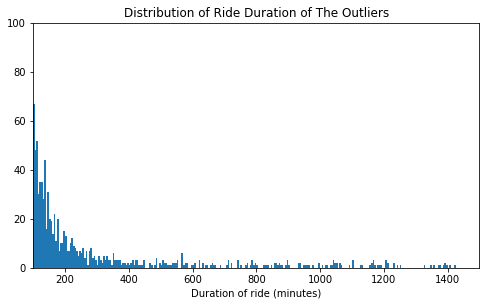

In [29]:
# distribution of ride duration of the outliers 
plt.figure(figsize=[8, 4.5])
plt.hist(data = ride, x = 'duration_min', bins = bins)
plt.xlabel('Duration of ride (minutes)')
plt.title('Distribution of Ride Duration of The Outliers')
plt.xlim([100,1500])
plt.ylim([0,100]);

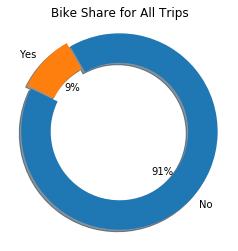

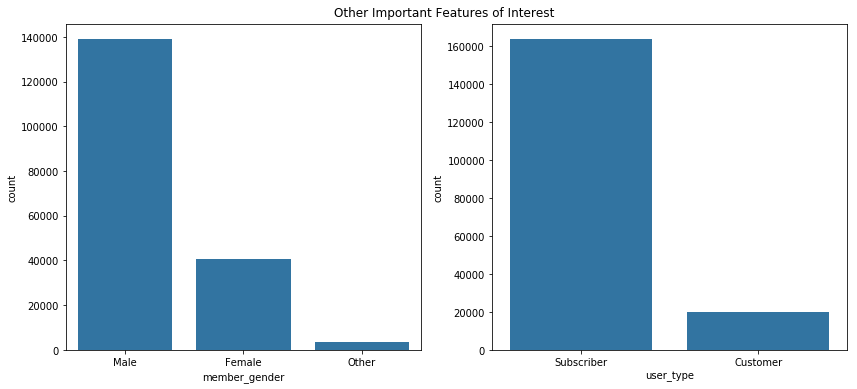

In [30]:
# checking the distribution of other important features of interest
nomFeat = ['member_gender','user_type']
default_color = sns.color_palette()[0]
bshare = ride.bike_share_for_all_trip.value_counts()
expl = [0,0.05]

# plot a pie chart of trip share status
plt.pie(bshare, labels = bshare.index, startangle = 120, explode = expl,
        counterclock = False, autopct='%1.0f%%', shadow=True, wedgeprops = {'width' : 0.3})
plt.axis('square')
plt.title('Bike Share for All Trips', loc='center');

# plot bar graph for both member gender and user type
fig, ax = plt.subplots(ncols=2, figsize = [14,6])
for feat in nomFeat:
    sns.countplot(data = ride, x = feat , color = default_color, ax = ax[nomFeat.index(feat)],
                  order = ride[feat].value_counts().index)
plt.suptitle('Other Important Features of Interest', y=0.92);


The pie chart shows that majority of the riders, **91%**, choose not to share their ride while only **9%** decide to. Likewise, most of these riders happen to be male, then followed by the female gender before others. Looking at the user_type, we can see a great difference between subscribers and customers as the former happen to be more than the latter.

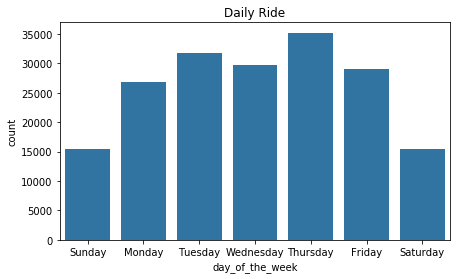

In [31]:
# rides by days of the week
wkdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
wkdaysCat = pd.api.types.CategoricalDtype(categories=wkdays, ordered=True)
ride['day_of_the_week']=ride['day_of_the_week'].astype(wkdaysCat)

plt.figure(figsize = [7, 4])
sns.countplot(data = ride, x = 'day_of_the_week' , color = default_color)
plt.title('Daily Ride');

Most of the rides are happening during the week days with Thursday recording the highest while the lowest being the weekends, both Saturday and Sunday.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The overall age distribution of the riders ranges from 20 to 140. However, most of the riders are of age 35-36 meaning they are youth. To avoid repetition, the distribution of the features of interest have been earlier documented and they didn't really require much transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Out of all the features investigated so far, only the trip period (duration in seconds) had to undergo a log transformation. It had values which ranged from 61 to 85,444 seconds equivalent to 1 minute to 23 hours. From the log transformation, it was evident that majority of the duration lies within 400 to 800 seconds and this is true because looking at the duration in minutes graph, the highest duration also lies within 5 to 15 minutes.

## Bivariate Exploration


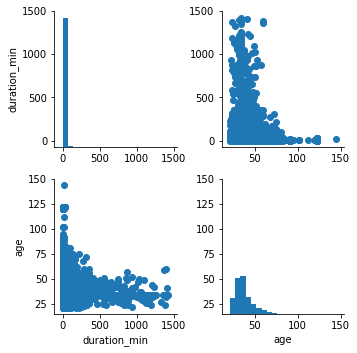

In [32]:
# taking a random 2000 sample trips for quicker and clearer analysis
numerical_vars = ['duration_min', 'age']

rideS = ride.sample(n=2000, replace = False)
g = sns.PairGrid(data = ride, vars = numerical_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

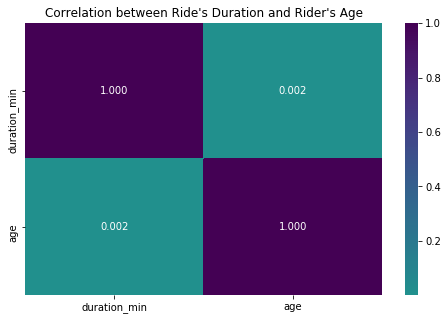

In [33]:
# correlation plot between the numerical variables
plt.figure(figsize = [8, 5])
sns.heatmap(ride[numerical_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title("Correlation between Ride's Duration and Rider's Age");

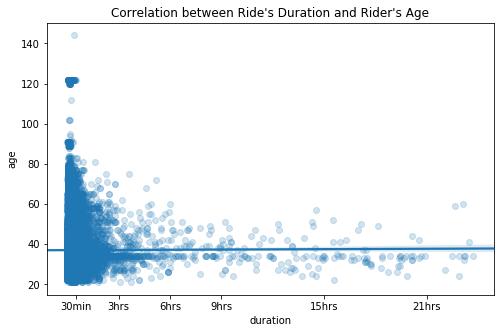

In [34]:
# further investigate the relationship between the two variables
plt.figure(figsize=[8,5])
sns.regplot(data=ride, x='duration_min', y='age', scatter_kws={'alpha':0.2}, x_jitter=0.1)
plt.title("Correlation between Ride's Duration and Rider's Age")
plt.xticks([30, 180, 360, 540, 900, 1260], ['30min', '3hrs', '6hrs', '9hrs', '15hrs', '21hrs'])
plt.xlabel('duration');

This shows us the overall relationship between rider's age and the actual period they spend on riding. The dark bottom left of the graph shows that most of our riders prefer short term riding (from 0 minutes to 2 hours) and most of these rides are by people of 20 to 60 years. It's also worthy to note that those riding 3hrs and beyond are youth around 30 years of age and not the old ones. 

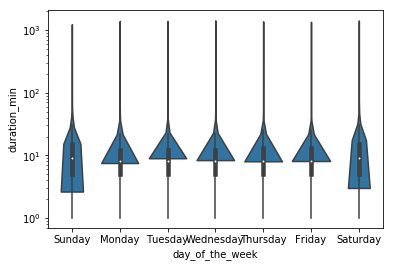

In [35]:
# average minutes spent on each day of the week
sns.violinplot(ride.day_of_the_week, ride.duration_min, color = default_color)
plt.yscale('log');

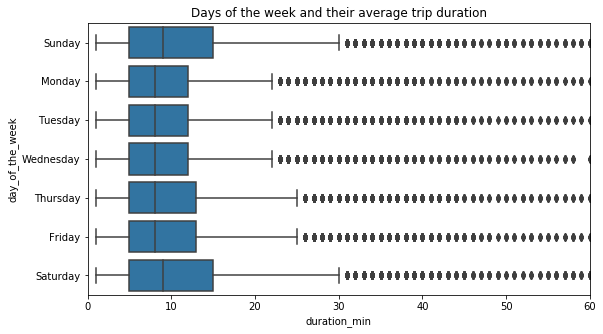

In [36]:
# reducing the trip duration to 60 minutes since majority of the ride falls within this range
plt.figure(figsize = [9, 5])
sns.boxplot(ride.duration_min,ride.day_of_the_week, color = default_color)
plt.xlim([0,60])
plt.title('Days of the week and their average trip duration');

On average, people spend more time riding on weekends than weekdays and the median riding duration for eacn day of the week happens to be less than 10 minutes for both weekends and weekdays.

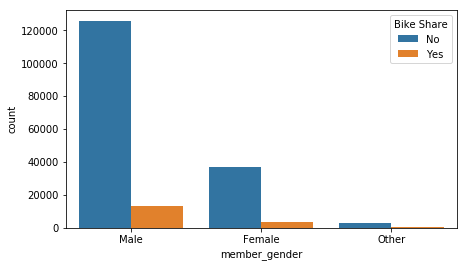

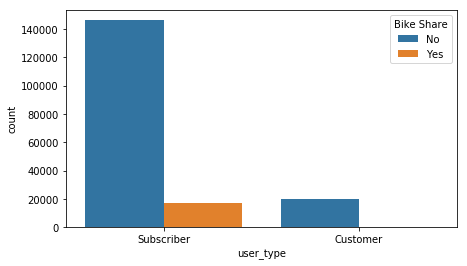

In [37]:
# checking the relationship of bike sharing with other features of interest
def sharecountplt(col):
    '''this function is created to plot relationship between bike sharing and other features'''
    sns.countplot(data = ride, x = col, hue = 'bike_share_for_all_trip', order = ride[col].value_counts().index)

# using the function to show relationship with other features    
columns = ['member_gender', 'user_type']
for col in columns:
    plt.figure(figsize = [7, 4])
    sharecountplt(col)
    plt.legend(loc=1, title='Bike Share')



There is a higher proportion of male and female as well as others not sharing their rides against those that do. Also, we have similar situation on the second graph where both Subscribers and Customers are mostly with No Bike Sharing opinion. It even seems like no customer is sharing any ride.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Just as stated above, most users do not share their rides. This is evident from both male and female distribution of bike sharing as quite a huge number of the two gender opt for NO to Bike Sharing, just as the Subscribers and Customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Amongst the relationships observed is the weak correlation between the user's age and the ride duration. There is 0.002 correlation between this two variables. While most users regardless of age tend to spend fewer time riding, we still have some people going as far as riding for 3 hours and beyond. However, it is only the youths that fall in this category.

## Multivariate Exploration


In [38]:
# creating a function for the visualization labels
def pltlabel(x,y,title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

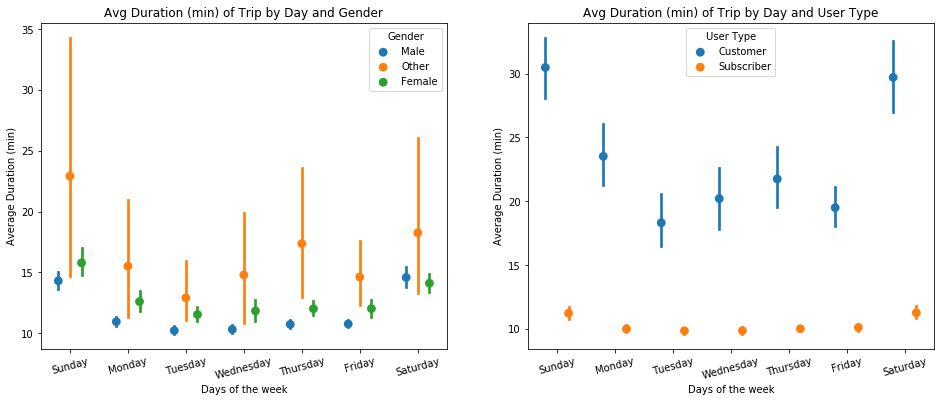

In [39]:
# the relationship between average duration of trip by day and other interesting features
plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)
sns.pointplot(data = ride, x = 'day_of_the_week', y = 'duration_min', hue = 'member_gender', linestyles = '', dodge = 0.4)
plt.xticks(rotation = 15)
pltlabel('Days of the week','Average Duration (min)','Avg Duration (min) of Trip by Day and Gender')
plt.legend(title= 'Gender', loc=0);

plt.subplot(1, 2, 2)
sns.pointplot(data = ride, x = 'day_of_the_week', y = 'duration_min', hue = 'user_type', linestyles = '', dodge = 0.4)
plt.xticks(rotation = 15)
pltlabel('Days of the week','Average Duration (min)','Avg Duration (min) of Trip by Day and User Type')
plt.legend(title= 'User Type', loc=0);


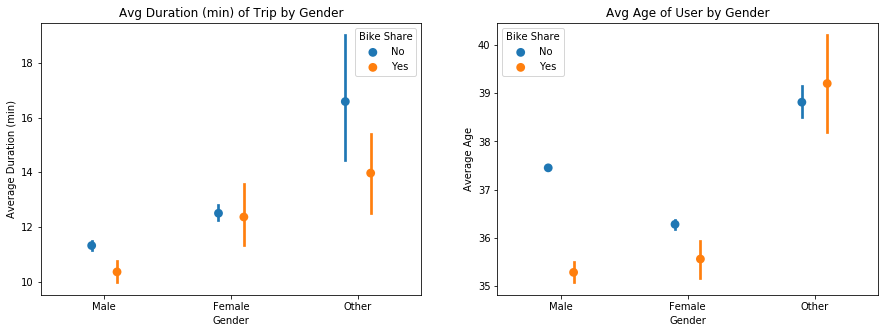

In [40]:
# the relationship between bike share and gender with other variables
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sns.pointplot(data = ride, x = 'member_gender', y = 'duration_min',hue = 'bike_share_for_all_trip', order=['Male','Female','Other'], linestyles = '', dodge = 0.2)
pltlabel('Gender', 'Average Duration (min)', 'Avg Duration (min) of Trip by Gender')
plt.legend(title = 'Bike Share', loc = 0);

plt.subplot(1, 2, 2)
sns.pointplot(data = ride, x = 'member_gender', y = 'age', hue = 'bike_share_for_all_trip', linestyles = '', dodge = 0.2, order=['Male','Female','Other']) 
pltlabel('Gender', 'Average Age', 'Avg Age of User by Gender')
plt.legend(title = 'Bike Share', loc = 0);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Across various days of the week, the duration of rides by male, female and other gender vary. Though other gender happens to be the least of the three genders in terms of number size, the gender however spends more time riding than its counterparts (male and female). While the female is a runner up, the male gender happens to ride for the shortest period. Furthermore, on average, customers happen to ride longer than subscribers as they ride approximately more than 18 minutes daily as against 10 minutes by the subscribers.
> On average, the female gender that share their ride and those that don't take about 13 minutes on a ride which is higher than their male counterpart but lower than other gender. Between male and female gender, more male do not share their ride and they are around 37 years of age while there is a close gap of age (around 36 years) between the female that share their ride and those that don't.

### Were there any interesting or surprising interactions between features?

> One of the interesting insights to take note is actually that of the daily number of rides against that of the duration spent riding. While there are relatively fewer rides during the weekdays, users actually spend more time riding during this period as against weekends. Also, female spends more time on riding than their male counterpart while other gender spend the most. 

## Conclusions
> My analysis is majorly on exploring the FordGoBike dataset. After careful assessment and wrangling of the data, I discovered the need to create three more variables from the existing features to aid my analysis which were duration minutes, age and days of the week.
>In the process of exploring the data, I applied univariate, bivariate, and multivariate visualization for the analysis. From the analysis, below are some of the findings as related to the features of interest:

> 1. Most of the trips are carried out on weekdays especially on Thursday.

> 2. Also, the duration on riding is skewed to the right implying that most users spend short time on riding usually between 1 to 20 minutes.

> 3. While 91% of users do not share their ride, only 9% do and the male gender happens to be the leading gender at saying NO to bike sharing.

> 4. Also, while there are relatively fewer rides during the weekends, users actually spend more time riding during this period as against weekdays.

> 5. On an average, female riders are younger than male riders but the male riders completed their trips faster than the female riders.

> 6. Some users ride for as long as 3 hours and beyond. However, it is only the youths around 30 years of age that fall in this category.

> 7. There are more Subscribers than Customers.
